In [10]:
import pandas as pd
from Models.LassoRegression import LassoRegression
from Models.RidgeRegression import RidgeRegression
from Models.RandomForestRegressor import RandomForestReg
from pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("Data/cleaned_data.csv")
models = [
    (LassoRegression("LassoREg", alpha=0.00001, max_iter=60, selection="random"),'LassoRegression'),
    (RandomForestReg(n_estimators=56, criterion='squared_error', max_depth= 10, min_samples_leaf=1, min_samples_split= 5),'RandomForestRegression'),
    (RidgeRegression("RidgeRegression", alpha = 0.5, max_iter = 100), "RidgeRegression")
]
model_scores = []

for model, model_name in models:
    pipeline = Pipeline(data ,model)
    scores = pipeline.fit_transform()
    scores['Model'] = model_name
    model_scores.append(scores)
    
scores_df = pd.DataFrame(model_scores)

2024-03-13 22:14:12.130 | INFO     | pipeline:fit_transform:32 - Training the model
2024-03-13 22:14:12.136 | INFO     | pipeline:data_preprocessing:17 - Data Preprocessing
2024-03-13 22:14:12.136 | INFO     | preprocessing.check_nans:transform:14 - CheckNans is starting
2024-03-13 22:14:12.141 | INFO     | preprocessing.check_nans:transform:17 - No NaNs in dataframe


2024-03-13 22:14:12.712 | INFO     | preprocessing.check_and_remove_outliers:transform:31 - Number of outliers in dataframe: 60
2024-03-13 22:14:12.714 | INFO     | pipeline:data_preprocessing:28 - Data Preprocessing completed
2024-03-13 22:14:12.721 | INFO     | Models.abstract_model:train:30 - Model was trained successfully: status:True
2024-03-13 22:14:12.738 | INFO     | pipeline:fit_transform:46 - Scores: {'MAE': 0.041825318374116315, 'MSE': 0.003416740402427674, 'RMSE': 0.05845289045400299, 'R2': 0.6649190711885854, 'MAPE': 0.07686965696443837}
2024-03-13 22:14:12.739 | INFO     | pipeline:fit_transform:47 - Training completed
2024-03-13 22:14:12.739 | INFO     | pipeline:fit_transform:32 - Training the model
2024-03-13 22:14:12.749 | INFO     | pipeline:data_preprocessing:17 - Data Preprocessing
2024-03-13 22:14:12.749 | INFO     | preprocessing.check_nans:transform:14 - CheckNans is starting
2024-03-13 22:14:12.757 | INFO     | preprocessing.check_nans:transform:17 - No NaNs in

Index(['R_EDUCATION_INCOME', 'R_ENTERTAINMENT', 'R_EXPENDITURE_DEBT',
       'R_DEBT_INCOME', 'CAT_GAMBLING', 'R_TAX_DEBT', 'R_EXPENDITURE',
       'R_UTILITIES_DEBT', 'INCOME', 'R_ENTERTAINMENT_DEBT',
       'R_GAMBLING_INCOME', 'R_DEBT_SAVINGS', 'DEBT'],
      dtype='object')


2024-03-13 22:14:13.126 | INFO     | preprocessing.check_and_remove_outliers:transform:31 - Number of outliers in dataframe: 50
2024-03-13 22:14:13.128 | INFO     | pipeline:data_preprocessing:28 - Data Preprocessing completed
2024-03-13 22:14:13.658 | INFO     | Models.abstract_model:train:30 - Model was trained successfully: status:True
2024-03-13 22:14:13.672 | INFO     | pipeline:fit_transform:46 - Scores: {'MAE': 0.046038862690792284, 'MSE': 0.004114969933537991, 'RMSE': 0.06414803140812655, 'R2': 0.7040275624599575, 'MAPE': 0.08473391186502957}
2024-03-13 22:14:13.677 | INFO     | pipeline:fit_transform:47 - Training completed
2024-03-13 22:14:13.677 | INFO     | pipeline:fit_transform:32 - Training the model
2024-03-13 22:14:13.685 | INFO     | pipeline:data_preprocessing:17 - Data Preprocessing
2024-03-13 22:14:13.686 | INFO     | preprocessing.check_nans:transform:14 - CheckNans is starting
2024-03-13 22:14:13.687 | INFO     | preprocessing.check_nans:transform:17 - No NaNs in

Index(['R_EDUCATION_INCOME', 'R_ENTERTAINMENT', 'R_EXPENDITURE_DEBT',
       'R_DEBT_INCOME', 'CAT_GAMBLING', 'R_TAX_DEBT', 'R_EXPENDITURE',
       'R_UTILITIES_DEBT', 'INCOME', 'R_ENTERTAINMENT_DEBT',
       'R_GAMBLING_INCOME', 'R_DEBT_SAVINGS', 'DEBT'],
      dtype='object')


2024-03-13 22:14:13.958 | INFO     | preprocessing.check_and_remove_outliers:transform:31 - Number of outliers in dataframe: 52
2024-03-13 22:14:13.961 | INFO     | pipeline:data_preprocessing:28 - Data Preprocessing completed
2024-03-13 22:14:13.968 | INFO     | Models.abstract_model:train:30 - Model was trained successfully: status:True
2024-03-13 22:14:13.981 | INFO     | pipeline:fit_transform:46 - Scores: {'MAE': 0.03898258424068768, 'MSE': 0.002870743776209939, 'RMSE': 0.05357932228210748, 'R2': 0.759424542868278, 'MAPE': 0.06980342156103332}
2024-03-13 22:14:13.984 | INFO     | pipeline:fit_transform:47 - Training completed


Index(['R_EDUCATION_INCOME', 'R_ENTERTAINMENT', 'R_EXPENDITURE_DEBT',
       'R_DEBT_INCOME', 'CAT_GAMBLING', 'R_TAX_DEBT', 'R_EXPENDITURE',
       'R_UTILITIES_DEBT', 'INCOME', 'R_ENTERTAINMENT_DEBT',
       'R_GAMBLING_INCOME', 'R_DEBT_SAVINGS', 'DEBT'],
      dtype='object')


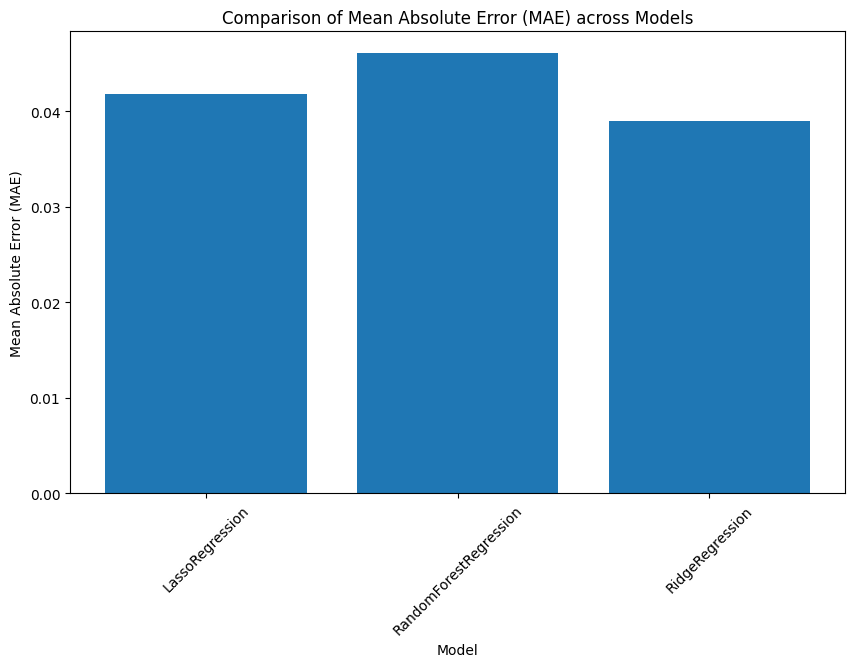

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(scores_df['Model'], scores_df['MAE'])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) across Models')
plt.xticks(rotation=45)
plt.show()

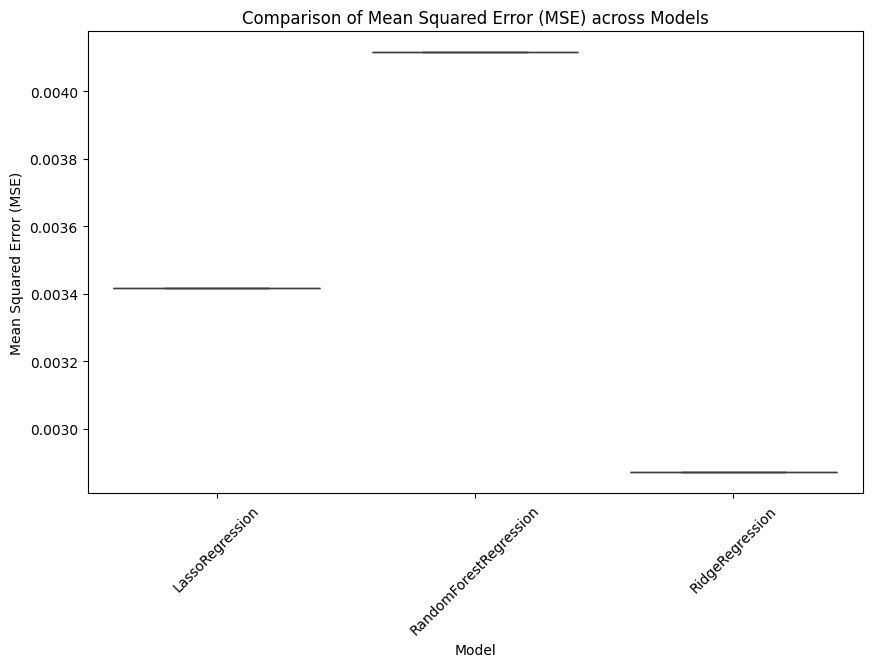

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='MSE', data=scores_df)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) across Models')
plt.xticks(rotation=45)
plt.show()

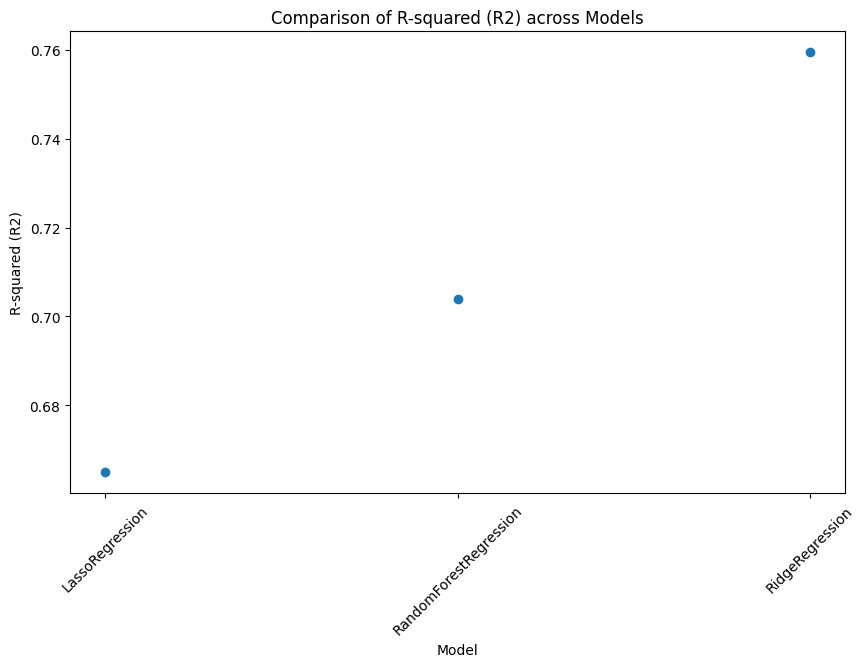

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(scores_df['Model'], scores_df['R2'])
plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) across Models')
plt.xticks(rotation=45)
plt.show()

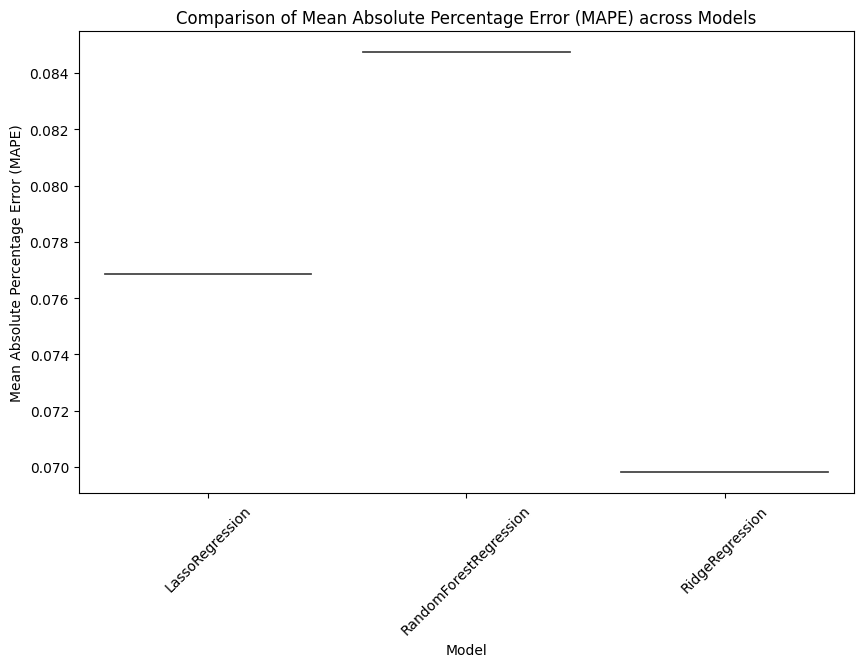

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Model', y='MAPE', data=scores_df)
plt.xlabel('Model')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.title('Comparison of Mean Absolute Percentage Error (MAPE) across Models')
plt.xticks(rotation=45)
plt.show()